# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Text(0.5, 1.0, 'Medical charges distribution')

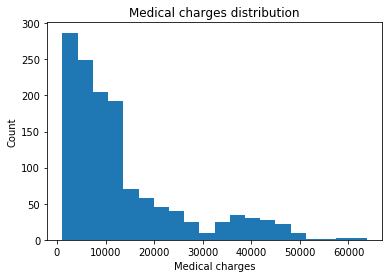

In [7]:
plt.hist(medical["charges"], bins = 20)
plt.xlabel("Medical charges")
plt.ylabel("Count")
plt.title("Medical charges distribution")

In [9]:
med_mean = np.mean(medical["charges"])
med_mean

13270.422265141257

In [10]:
med_std = np.std(medical["charges"])
med_std

12105.484975561605

In [11]:
# The distributions doesn't tend to be Gaussian.
# The data is highly spread out w.r.t.  to mean value with the standard deviation of 12105.5
# As can be seen through the histogram, the data is highly skewed to the left

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In [12]:
# A Z-test is useful when sample size is more than 30 (here the sample size is 1338).  
# A T-test is useful for sample size less than 30.
# However, to use Z-test, we must know the population parameters (mu and sigma) which is not the case with T-test.
# A t-test, however, can still be applied to larger samples and as the sample size grows larger and larger, 
# the results of a t-test and z-test become closer and closer.
# However, both the tests assume the distribution to be normal.
# However, Z-test and t-test can still be used for data which is non-normally distributed as wellif the sample 
# size is greater than 20.

# Here, since the data sample is more than 30 but the true population paarameters are unknown, we might use a T-test

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__

In [21]:
from scipy import stats as st
# We have to calculate 95% confidence interval using t - test.
# Since the admin is concerned about charges falling below a certain level, we can use one sided interval.
# Our null hypothesis is that the actual charges haven't fallen below 12000 (i.e. this sample is by a pure chance).
# Our alternate hypethesis is that actual charges have fallen below 12000.
# We are doing One sample T test here.

# Additional information:
# Significance level = alpha = 1 - confidence level
# Significance level is the probability of rejecting the null hypothesis when it is true.
# Here significance level = 1-0.95 = 0.05
# Because p_value can be compared to significance level i.e p_value <= 0.5 then reject Null Hypothesis and conclude 
# that the effect in sample observation is statistically significant.


In [25]:
n = len(medical.charges)
dof = n - 1
critical_value = t(dof).ppf(0.95)
critical_value

1.6459941145571317

In [28]:
standard_error = med_std/np.sqrt(n)
standard_error

330.943713906084

In [33]:
t_MOE = critical_value * standard_error
t_MOE

544.7314053390934

In [35]:
conf_interval = [med_mean - t_MOE, med_mean + t_MOE]
conf_interval

[12725.690859802164, 13815.15367048035]

In [36]:
# As per the calculated confidence interval, we can be certain that 95% of the time that a sample is taken,
# it's mean will fall between 12725.7 and 13815.15
# Thus, the admin should not be concerned that the actual average has fallen below 12000

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__

In [ ]:
# Such a type of test is called The independent t-test 
# It assumes the variances of the two groups we are measuring are equal in the population. 
# If the variances are unequal, this can affect the Type I error rate. 

In [ ]:
# Null hypothesis: The people with insurance are not charged a different amount to those without
# Alternate hypothesis: The people with insurance really are charged a different amount to those without

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [46]:
# We have two groups: insured people and uninsured people
# Insurance claim 1 means insured people and 0 means uninsured

insured = medical["charges"][medical["insuranceclaim"] == 1]
uninsured = medical["charges"][medical["insuranceclaim"] == 0]

mean_insured = np.mean(insured)
mean_uninsured = np.mean(uninsured)
std_insured = np.std(insured)
std_uninsured = np.std(uninsured)
n_insured = len(insured)
n_uninsured = len(uninsured)

print("Total insured people:", n_insured)
print("Total uninsured people:", n_uninsured)

print("Mean and std of charges of insured people resp. are:", mean_insured, "and", std_insured)
print("Mean and std of charges of uninsured people resp. are:", mean_uninsured, "and", std_uninsured)

Total insured people: 783
Total uninsured people: 555
Mean and std of charges of insured people resp. are: 16423.928276537663 and 14036.956250260411
Mean and std of charges of uninsured people resp. are: 8821.421892306294 and 6440.699841605233


In [57]:
# Applying formula manually!

sp = np.sqrt((((n_insured - 1) * (std_insured ** 2)) + ((n_uninsured - 1) * (std_uninsured ** 2)))
             /(n_insured + n_uninsured - 2))

tval = (mean_insured - mean_uninsured)/(sp * np.sqrt((1/n_insured) + (1/n_uninsured)))
tval

11.901306943555385

In [73]:
# This is not working, giving nan, also I couldnt't make out what value of n will be used here

st.t.ppf(tval, n-1)

nan

In [72]:
# Calculating using scipy
# The results are same

st.ttest_ind(insured, uninsured)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [74]:
st.ttest_ind(insured, uninsured, equal_var = False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In [ ]:
"""
scipy.stats.zscore(a, axis=0, ddof=0)

Calculates the z score of each value in the sample, relative to the sample mean and standard deviation.

Parameters:
    
a : array_like
    An array like object containing the sample data.

axis : int or None, optional
       If axis is equal to None, the array is first raveled. If axis is an integer, this is the axis over which to operate. Default is 0.

ddof : int, optional
       Degrees of freedom correction in the calculation of the standard deviation. Default is 0.

Returns:
    
zscore : array_like
         The z-scores, standardized by mean and standard deviation of input array a.
"""

In [ ]:
# The documentation does show a zscore calculation but doesn't show s z test function.
# However, another module does have a fucntion:
#          statsmodels.stats.weightstats.ztest

"""
statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

test for mean based on normal distribution, one or two samples

In the case of two samples, the samples are assumed to be independent.
"""

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test